In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns 
import yfinance as yf
import datetime as dt
import sklearn
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import  seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools

  


In [2]:
date.today()

datetime.date(2024, 12, 7)

In [3]:
from datetime import datetime, timedelta, date

# Get today's date
today = date.today()

# Format today's date as a string
d1 = today.strftime("%Y-%m-%d")  # Corrected from starftime to strftime
end_date = d1

# Calculate the date 365 days ago
d2 = date.today() - timedelta(days=365)

# Format the date 365 days ago as a string
d2 = d2.strftime("%Y-%m-%d")  # Corrected from starftime to strftime
start_date = d2

# Print the results
print("YOUR DATA WILL BE BETWEEN THESE DATES:", start_date, end_date)

YOUR DATA WILL BE BETWEEN THESE DATES: 2023-12-08 2024-12-07


In [4]:
ticker = 'GOOGL'
df = yf.download(ticker,    start= start_date, end= end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2023-12-08,134.656570,134.990005,136.399994,134.029999,134.199997,32233900
2023-12-11,132.960754,133.289993,133.339996,131.360001,132.380005,31138000
2023-12-12,132.192673,132.520004,133.000000,131.259995,131.809998,29032800
2023-12-13,132.242554,132.570007,133.500000,131.570007,133.380005,30104800
2023-12-14,131.614090,131.940002,133.720001,129.690002,133.380005,38722400


In [5]:
df["Date"] = df.index
df.reset_index(drop= True, inplace= True)


In [6]:
df.columns

MultiIndex([('Adj Close', 'GOOGL'),
            (    'Close', 'GOOGL'),
            (     'High', 'GOOGL'),
            (      'Low', 'GOOGL'),
            (     'Open', 'GOOGL'),
            (   'Volume', 'GOOGL'),
            (     'Date',      '')],
           names=['Price', 'Ticker'])

In [7]:
df = df[['Date','Open','High','Low','Close','adj Close','Volume']]

KeyError: "['adj Close'] not in index"

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Adj Close, GOOGL)  251 non-null    float64       
 1   (Close, GOOGL)      251 non-null    float64       
 2   (High, GOOGL)       251 non-null    float64       
 3   (Low, GOOGL)        251 non-null    float64       
 4   (Open, GOOGL)       251 non-null    float64       
 5   (Volume, GOOGL)     251 non-null    int64         
 6   (Date, )            251 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [9]:
df.insert(0, "Date" , df.index, True)


In [10]:
df.columns

MultiIndex([(     'Date',      ''),
            ('Adj Close', 'GOOGL'),
            (    'Close', 'GOOGL'),
            (     'High', 'GOOGL'),
            (      'Low', 'GOOGL'),
            (     'Open', 'GOOGL'),
            (   'Volume', 'GOOGL'),
            (     'Date',      '')],
           names=['Price', 'Ticker'])

In [11]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,Date
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,
0,0,134.656570,134.990005,136.399994,134.029999,134.199997,32233900,2023-12-08
1,1,132.960754,133.289993,133.339996,131.360001,132.380005,31138000,2023-12-11
2,2,132.192673,132.520004,133.000000,131.259995,131.809998,29032800,2023-12-12
3,3,132.242554,132.570007,133.500000,131.570007,133.380005,30104800,2023-12-13
4,4,131.614090,131.940002,133.720001,129.690002,133.380005,38722400,2023-12-14


In [12]:
df.describe()

Price,Date,Adj Close,Close,High,Low,Open,Volume,Date
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251
mean,125.000000,160.213002,160.455419,162.008964,158.880040,160.392311,2.724076e+07,2024-06-09 06:01:26.055776768
min,0.000000,131.075424,131.399994,133.000000,129.690002,131.619995,1.024210e+07,2023-12-08 00:00:00
25%,62.500000,147.275322,147.639999,149.389999,146.820000,148.290001,2.052945e+07,2024-03-11 12:00:00
50%,125.000000,162.744049,162.850006,164.729996,161.690002,163.320007,2.410030e+07,2024-06-10 00:00:00
75%,187.500000,171.605087,172.029999,174.135002,170.680000,172.529999,3.115990e+07,2024-09-09 12:00:00
max,250.000000,190.926636,191.179993,191.750000,189.029999,190.309998,7.191000e+07,2024-12-06 00:00:00
std,72.601653,14.932281,14.878513,15.026570,14.777531,14.929858,1.065139e+07,NaN


In [13]:
#select columns
df = df[['Date','Close']]
df.head()

Price  Date                  Close
Ticker                       GOOGL
0         0 2023-12-08  134.990005
1         1 2023-12-11  133.289993
2         2 2023-12-12  132.520004
3         3 2023-12-13  132.570007
4         4 2023-12-14  131.940002

In [14]:

fig = px.line(df, x='Date', y='Close', title='Google Stock Price')
fig.show()


ValueError: 2

In [15]:
#stationarity check on data
from statsmodels.tsa.stattools import adfuller
def check_stationarity(df):
 result =adfuller(df)
 print('ADF Statistics: %f' % result[0])
 print('p-value:  %f' % result[1]) 
 if result[1] <= 0.05:
  print("Reject null hypothesis, data is stationary")
 else:
  print("Failed to reject null hypothesis, data is non-stationary")
  check_stationarity(df['Close'])
  


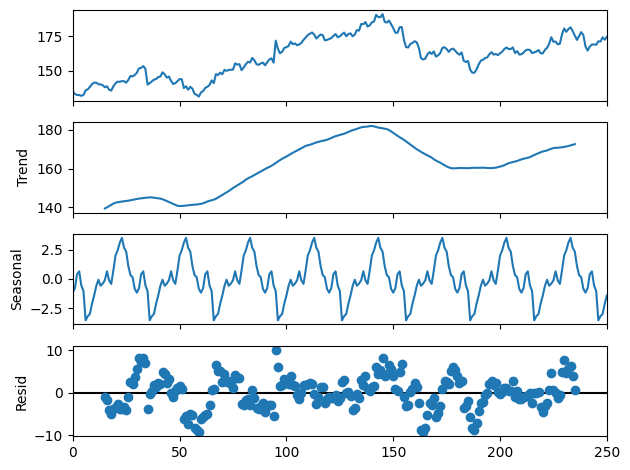

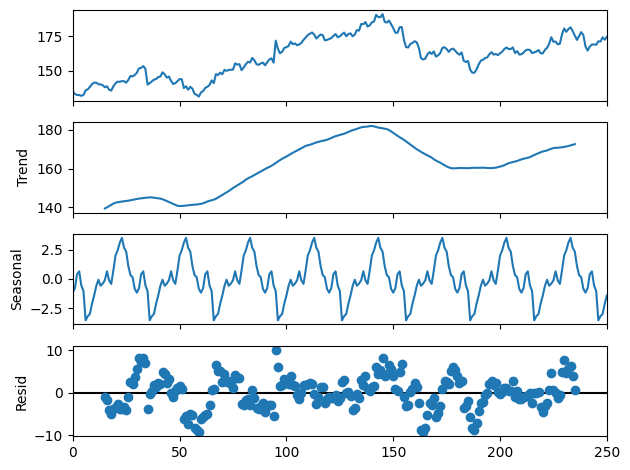

In [16]:
from statsmodels.tsa.seasonal   import  seasonal_decompose
decompose =  seasonal_decompose(df['Close'], model='additive', period=30)
decompose.plot()

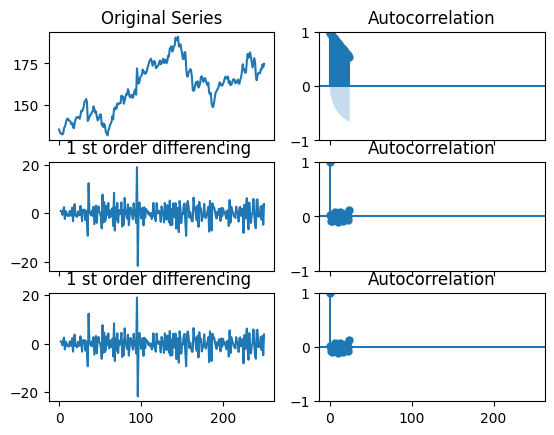

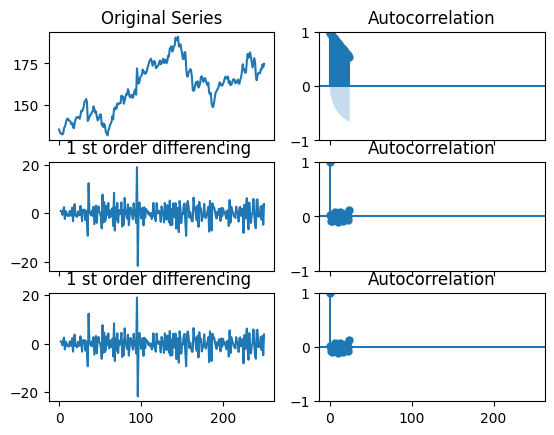

In [17]:
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf
import matplotlib
#Original Series
fig, axes = plt.subplots(3,2, sharex=True)
axes[0,0].plot(df['Close']); axes[0,0].set_title('Original Series')
plot_acf (df['Close'], ax=axes[0,1])

#1 st order differencing 
axes [1,0].plot(df['Close'].diff().diff()); axes[1,0].set_title('1 st order differencing ')
plot_acf (df['Close'].diff().dropna(), ax=axes[1,1])

 #2nd order differencing 
axes [2,0].plot(df['Close'].diff().diff()); axes[2,0].set_title('1 st order differencing ')
plot_acf (df['Close'].diff().dropna(), ax=axes[2,1])


           0
0   1.000000
1   0.975973
2   0.950849
3   0.927391
4   0.907463
5   0.887384
6   0.867910
7   0.848282
8   0.826536
9   0.805772
10  0.786473
11  0.770345
12  0.751173
13  0.731605
14  0.710147
15  0.691252
16  0.672936
17  0.656764
18  0.637727
19  0.617391
20  0.599823
21  0.582067
22  0.564793
23  0.548910


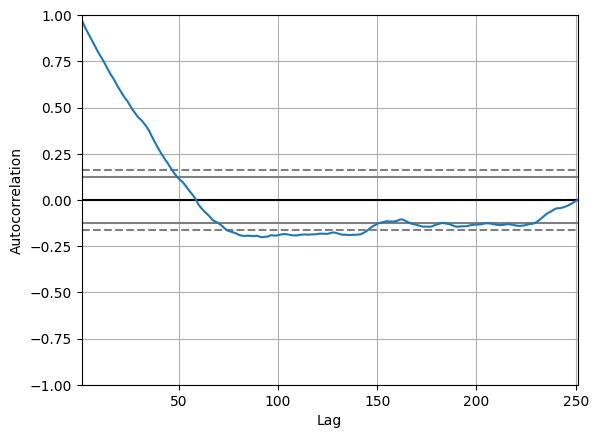

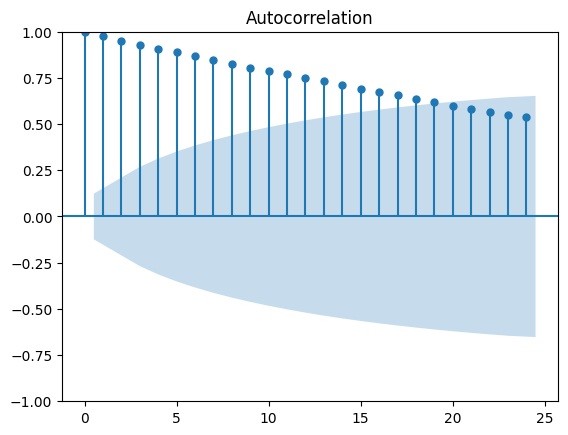

In [18]:
#find p value
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['Close'])
plot_acf(df['Close'], alpha=0.05)
from statsmodels.tsa.stattools import acf,pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

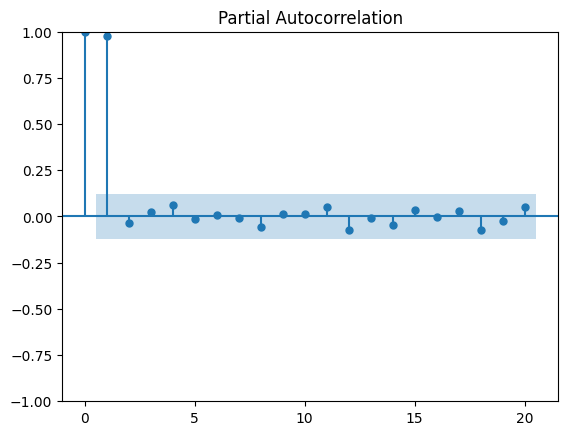

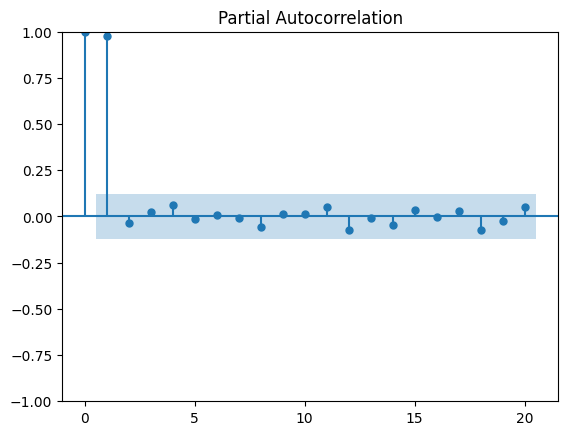

In [19]:
#partial autocorrection 
from statsmodels.tsa.stattools import   acf,pacf
plot_pacf(df['Close'], lags=20 , alpha=0.05)

In [20]:
#lets define p,d,q
p = 2
d = 1
q = 2


In [21]:
#lets run arima with pmdarima
from pmdarima.arima  import auto_arima
model = auto_arima (df['Close'],start_P= 2, start_q= 2, max_p=5, max_q =5, start_p=0, seasonal=True,d =1, D =1, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1209.544, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1207.182, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1209.055, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1209.032, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1206.057, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1210.531, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.218 seconds


In [22]:
model = auto_arima(df['Close'], seasonal=True,suppress_warnings=True)
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -602.028
Date:                Sat, 07 Dec 2024   AIC                           1206.057
Time:                        13:47:20   BIC                           1209.578
Sample:                             0   HQIC                          1207.474
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.2308      0.325     22.233      0.000       6.593       7.868
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               370.04
Prob(Q):                              0.72   Pr

                               SARIMAX Results                                
Dep. Variable:                  GOOGL   No. Observations:                  251
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -598.470
Date:                Sat, 07 Dec 2024   AIC                           1206.940
Time:                        13:47:25   BIC                           1224.547
Sample:                             0   HQIC                          1214.026
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1205      0.025     44.639      0.000       1.071       1.170
ar.L2         -0.9993      0.015    -67.445      0.000      -1.028      -0.970
ma.L1         -1.1267      0.235     -4.790      0.0

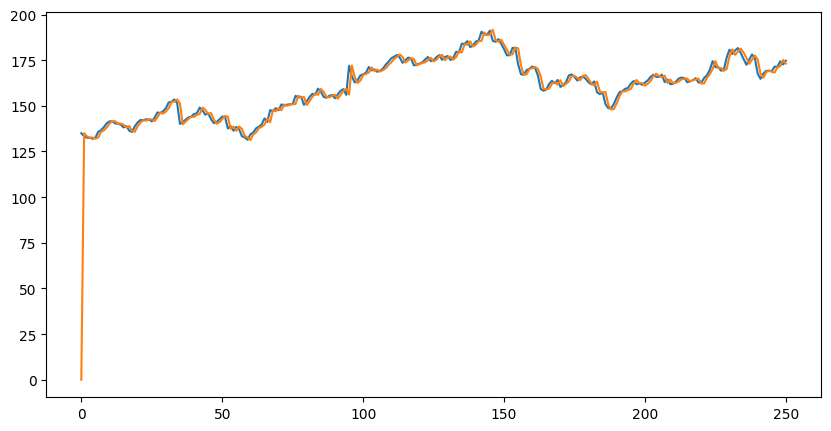

In [23]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p,d,q = 2 , 1, 2
model = ARIMA(df['Close'],order= (p,d,q))
model = model.fit()
print(model.summary())
#predict next 30 days
forecast = model.predict(n_periods=30)
print(forecast)
#plot forecast
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

In [24]:
#lets run SARIMA
import statsmodels.api as sm
import warnings
p,d,q = 2,1,2
model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p,d,q),
                                  seasonal_order= (p,d,q,12))
model = model.fit()
print(model.summary())


c:\Users\valla\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\valla\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                              GOOGL   No. Observations:                  251
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -586.922
Date:                            Sat, 07 Dec 2024   AIC                           1191.845
Time:                                    13:47:38   BIC                           1223.095
Sample:                                         0   HQIC                          1204.439
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1090      0.040     27.874      0.000       1.031       1.187
ar.L2         -0.9947      0.031   

c:\Users\valla\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


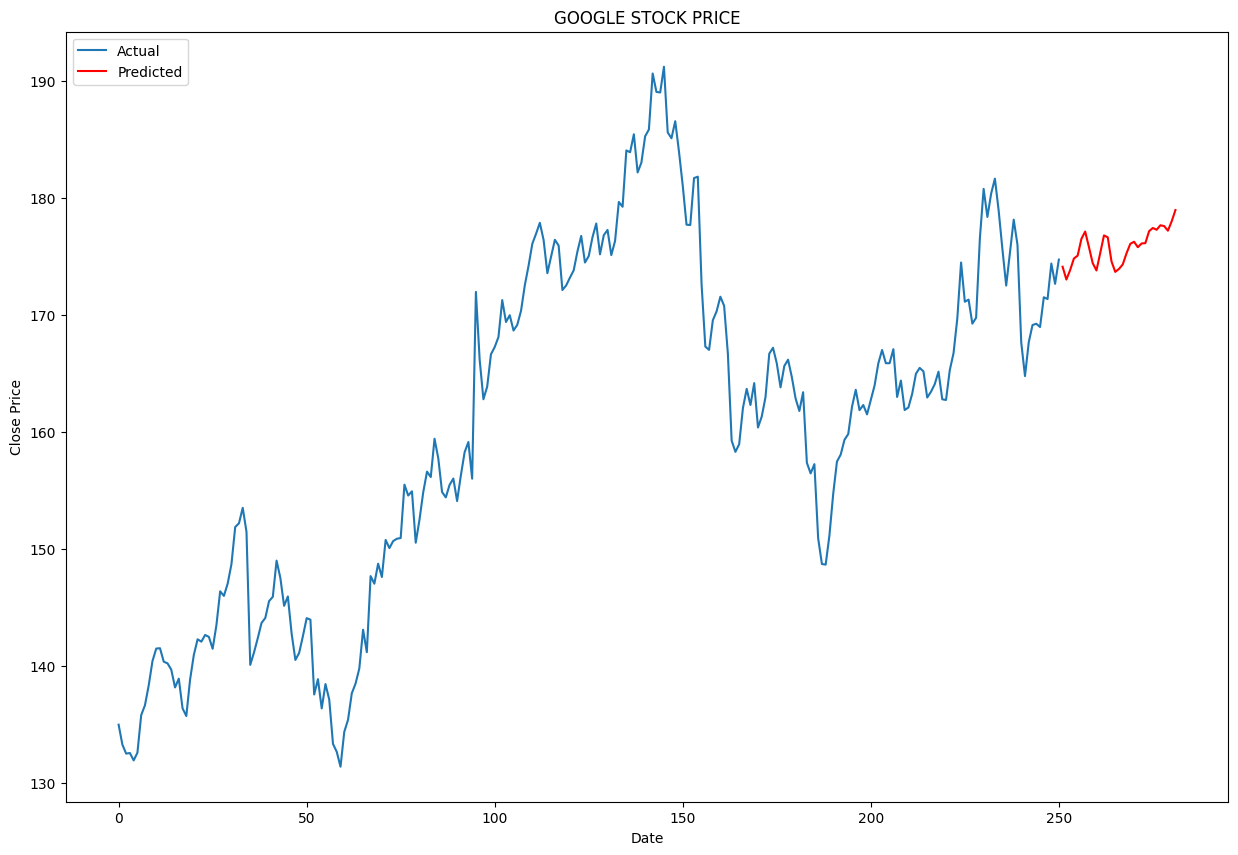

In [25]:
predictions =  model.predict(start = len(df['Close']), end = len(df['Close'])+30) 
#plot predictions
plt.figure(figsize=(15,10))
plt.plot(df["Close"], label ='Actual')
plt.plot(predictions, color ='red',label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('GOOGLE STOCK PRICE')

#change legend location
plt.legend(loc='upper left')
plt.show()

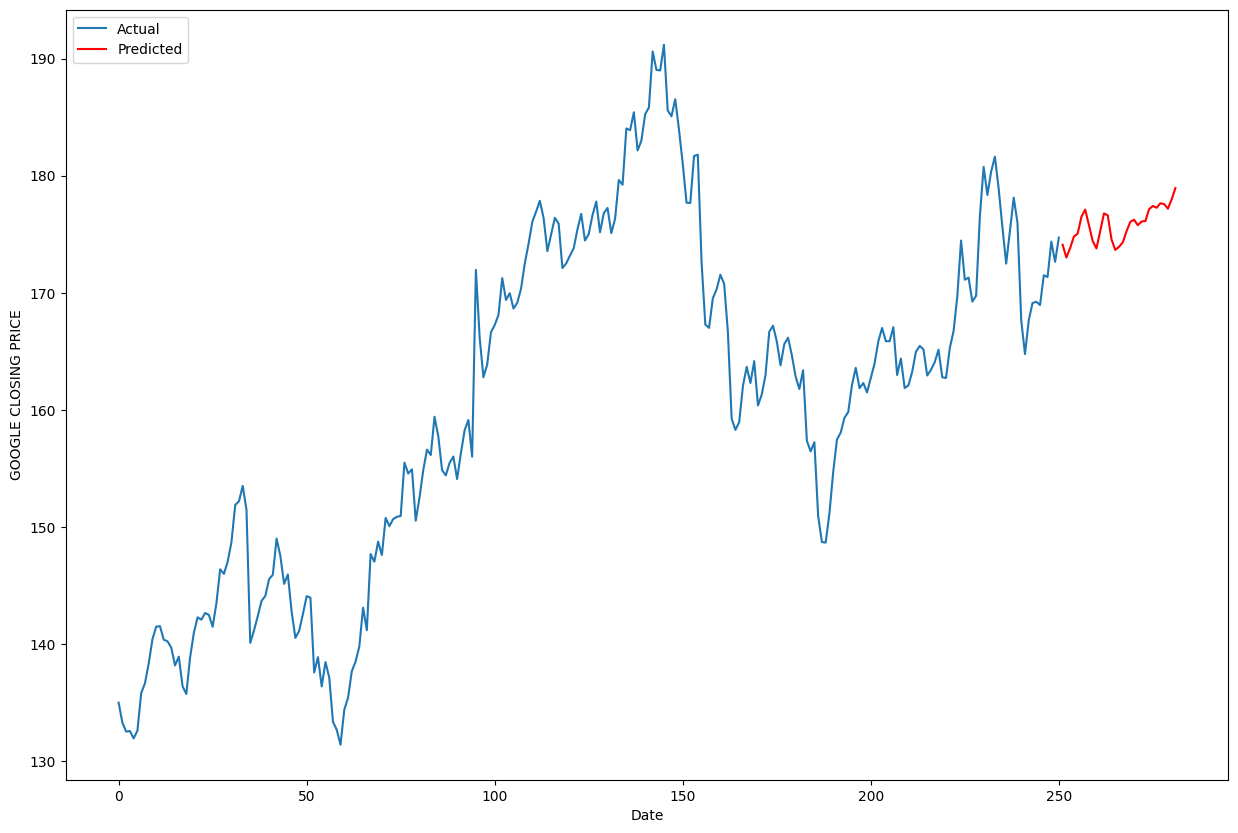

In [26]:
#lets update p,d,q

#plot the prediction
plt.figure(figsize=(15,10))
plt.plot(df["Close"], label ='Actual' )
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.ylabel('GOOGLE CLOSING PRICE')

#change  legend location
plt.legend(loc='upper left') 
plt.show()


BEST SARIMA(0, 0, 0)X(0, 0, 0, 12)12 model - AIC:3252.9074557727977
BEST SARIMA(0, 0, 0)X(0, 0, 1, 12)12 model - AIC:2821.1365884661786
BEST SARIMA(0, 0, 0)X(0, 1, 0, 12)12 model - AIC:1717.6108476288389
BEST SARIMA(0, 0, 0)X(0, 1, 1, 12)12 model - AIC:1641.356055523572
BEST SARIMA(0, 0, 0)X(0, 1, 1, 12)12 model - AIC:1641.356055523572
BEST SARIMA(0, 0, 0)X(0, 1, 1, 12)12 model - AIC:1641.356055523572
BEST SARIMA(0, 0, 0)X(0, 1, 1, 12)12 model - AIC:1641.356055523572
BEST SARIMA(0, 0, 0)X(0, 1, 1, 12)12 model - AIC:1641.356055523572
BEST SARIMA(0, 0, 0)X(0, 1, 1, 12)12 model - AIC:1641.356055523572
BEST SARIMA(0, 0, 0)X(0, 1, 1, 12)12 model - AIC:1641.356055523572
BEST SARIMA(0, 0, 1)X(0, 1, 0, 12)12 model - AIC:1517.7603329556657
BEST SARIMA(0, 0, 1)X(0, 1, 1, 12)12 model - AIC:1442.377394984977
BEST SARIMA(0, 0, 1)X(0, 1, 1, 12)12 model - AIC:1442.377394984977
BEST SARIMA(0, 0, 1)X(0, 1, 1, 12)12 model - AIC:1442.377394984977
BEST SARIMA(0, 0, 1)X(0, 1, 1, 12)12 model - AIC:1442.3773

c:\Users\valla\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582


c:\Users\valla\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC:1126.3157454764582
BEST SARIMA(0, 1, 1)X(0, 1, 1, 12)12 model - AIC

c:\Users\valla\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2469: ValueWarning: Dynamic prediction specified to begin after the end of prediction, and so has no effect.
  warn('Dynamic prediction specified to begin after the end of'


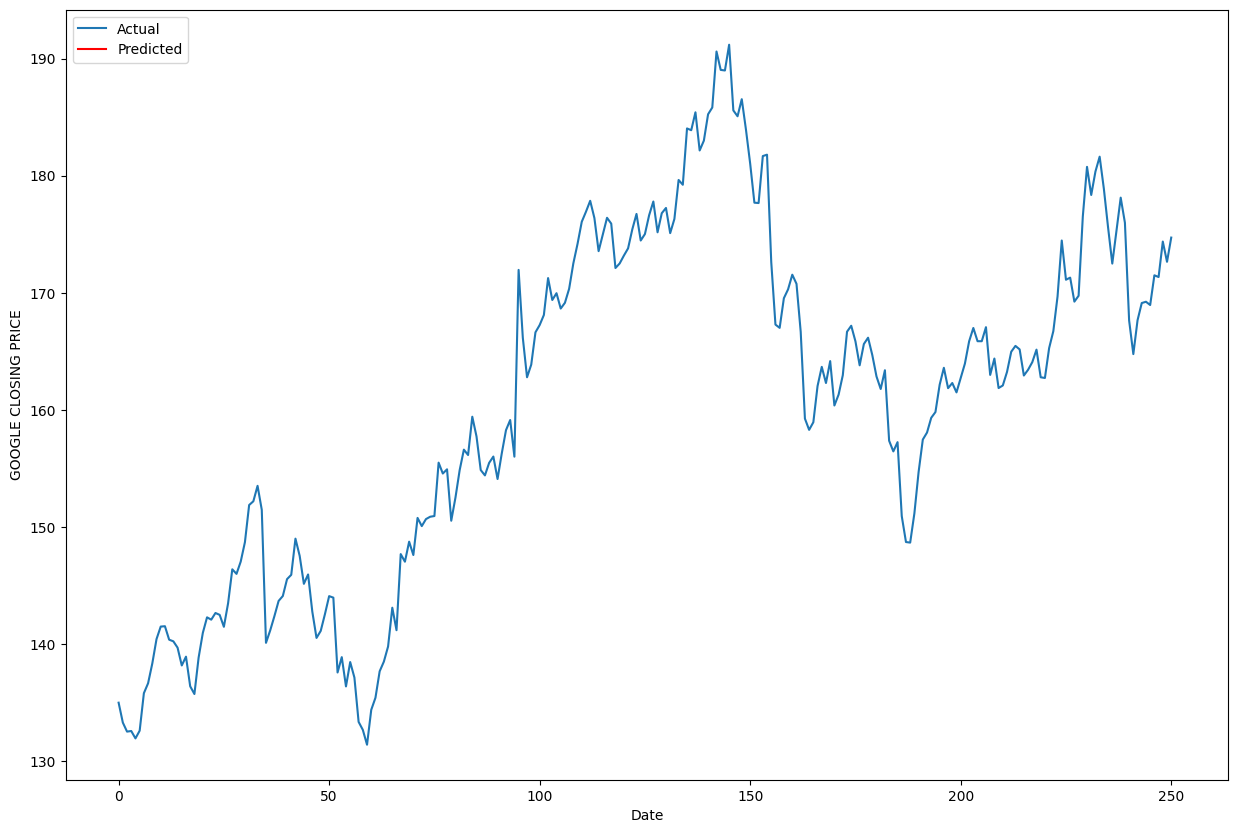

In [27]:
#hyper parameter
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      temp_model = SARIMAX(df['Close'],
                           order = param,
                           seasonal_order= param_seasonal,
                           enforce_stationarity=False,
                           enforce_invertibility=False)
      results = temp_model.fit()

      #print("SARIMAX{}X{}12-AIC:{}".format(param, param_seasonal, result.aic))
      if results.aic < best_aic:
        best_aic = results.aic
        best_pdq = param
        best_seasonal_pdq = param_seasonal

    except:
      continue

    print("BEST SARIMA{}X{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

    #predict next 30 days
    model = SARIMAX(df['Close'],
                    order=best_pdq,
                    seasonal_order= best_seasonal_pdq,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    model = model.fit()
predictions = model.predict(len(df['Close']),len(df['Close']),+30)
predictions


#plot the prediction
plt.figure(figsize=(15,10))
plt.plot(df["Close"], label ='Actual' )
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.ylabel('GOOGLE CLOSING PRICE')

#change  legend location
plt.legend(loc='upper left') 
plt.show()


In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              GOOGL   No. Observations:                  251
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -560.158
Date:                            Sat, 07 Dec 2024   AIC                           1126.316
Time:                                    13:48:37   BIC                           1136.551
Sample:                                         0   HQIC                          1130.447
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0199      0.052      0.381      0.703      -0.083       0.122
ma.S.L12      -0.9599      0.145     -6.642      0.000      -1.243      -0.677
sigma2         7.9626      0.917      8.686      0.000       6.166       9.759
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               329.23
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             0.25
Prob(H) (two-sided):                  0.03   Kurtosis:                         8.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""